In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


**Business Scenario**
A wholesale distributor supplies products to different types of clients such as:

Retail stores

Cafés

Hotels

Restaurants

Currently, all customers are treated the same, which leads to:

Inefficient inventory planning

Poor marketing strategies

Missed upselling opportunities

The company wants to group customers based on their purchasing behavior to improve decision-making.

**Task 1: Data Exploration**

Load the dataset and inspect all available features.

Identify which columns represent customer purchasing behavior.

Remove or ignore columns that are not directly related to spending patterns.

In [ ]:
import pandas as pd
df=pd.read_csv('Wholesale customers data.csv')

In [ ]:
print("Dataset preview :")
df.head()

Dataset preview :


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
print("Missing values :")
df.isna().sum()

Missing values :


,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [ ]:
#removing non spending columns
df_spending = df.drop(columns=['Channel', 'Region'])
print("Spending Data Preview:")
df_spending.head()

Spending Data Preview:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [ ]:
df_spending.shape

(440, 6)

**Task 2: Feature Selection**

Select suitable numerical features that can represent customer buying habits.

Justify your feature selection briefly.

In [ ]:
X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
#they represent customers’ spending across different product categorie

**Task 3: Data Preparation**

Prepare the selected data so that distance-based grouping works correctly.

Verify that all features contribute fairly to distance calculation.

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
import pandas as pd
import numpy as np

X_scaled_df = pd.DataFrame(X, columns=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])

print("Mean of each feature:")
print(X_scaled_df.mean())
print("\nStandard deviation of each feature:")
print(X_scaled_df.std())


Mean of each feature:
Fresh              -2.018587e-17
Milk                0.000000e+00
Grocery            -2.422305e-17
Frozen              0.000000e+00
Detergents_Paper    1.614870e-17
Delicassen          0.000000e+00
dtype: float64

Standard deviation of each feature:
Fresh               1.001138
Milk                1.001138
Grocery             1.001138
Frozen              1.001138
Detergents_Paper    1.001138
Delicassen          1.001138
dtype: float64


**Task 4: Clustering Model Construction**

Build a clustering model to group customers into K segments.

Experiment with multiple values of K.

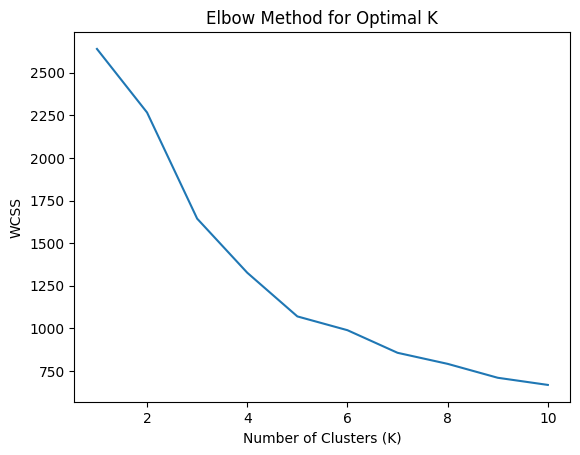

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

**Task 5: Optimal Cluster Identification**

Identify a suitable number of customer groups using an appropriate approach.

Explain why this value of K is reasonable.

In [ ]:
# K = 5 is selected as the optimal number of clusters
#  because the elbow point occurs at K = 5,
#  After K = 5, the reduction in WCSS becomes very small
#indicating that adding more clusters gives little improvement.

**Task 6: Cluster Assignment**

Assign each customer to a cluster.

Add the cluster label to the dataset.

In [ ]:
from sklearn.cluster import KMeans

k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
kmeans.fit(X_scaled_df)
cluster_labels = kmeans.labels_
df['Cluster'] = cluster_labels
print("Dataset with cluster labels:")
print(df.head())


Dataset with cluster labels:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        3  
1        1776        0  
2        7844        0  
3        1788        3  
4        5185        1  


**Task 7: Cluster Visualization**

Visualize customer clusters using two important spending categories.

Mark cluster centers clearly in the visualization.

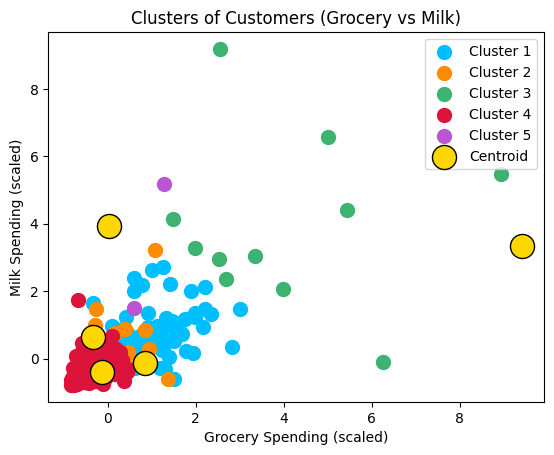

In [ ]:
import matplotlib.pyplot as plt

X_vis = X_scaled_df[['Grocery', 'Milk']].values
y_kmeans = df['Cluster'].values
colors = ['deepskyblue', 'darkorange', 'mediumseagreen', 'crimson', 'mediumorchid']
for i in range(5):
    plt.scatter(X_vis[y_kmeans == i, 0], X_vis[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 1],
            s=300, c='gold', label='Centroid', edgecolor='black')
plt.title('Clusters of Customers (Grocery vs Milk)')
plt.xlabel('Grocery Spending (scaled)')
plt.ylabel('Milk Spending (scaled)')
plt.legend()
plt.show()

**Task 8: Cluster Profiling**

For each cluster:

   Calculate average spending per category
   
   Identify dominant purchase patterns

Summarize each cluster in business-friendly language.

In [ ]:
# Calculate average spending per cluster
cluster_profile = df.groupby('Cluster')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()
print("Average Spending per Cluster:\n")
print(cluster_profile)

Average Spending per Cluster:

                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0         5509.250000  10555.635417  16477.927083   1420.125000   
1        34188.627119   4850.576271   5870.000000   7215.559322   
2        16911.090909  34864.363636  46126.181818   3245.454545   
3         9112.235294   2965.404412   3783.702206   2413.591912   
4        34782.000000  30367.000000  16898.000000  48701.500000   

         Detergents_Paper    Delicassen  
Cluster                                  
0             7199.406250   1658.791667  
1              955.847458   2491.796610  
2            23008.090909   4177.363636  
3              976.908088    974.926471  
4              755.500000  26776.000000  


In [ ]:
for cluster in cluster_profile.index:
    avg_values = cluster_profile.loc[cluster]
    dominant_category = avg_values.idxmax()
    print(f"\nCluster {cluster + 1}:")
    print(f"- Spends most on: {dominant_category}")
    print(f"- Average spending (per category):")
    print(avg_values.to_dict())


Cluster 1:
- Spends most on: Grocery
- Average spending (per category):
{'Fresh': 5509.25, 'Milk': 10555.635416666666, 'Grocery': 16477.927083333332, 'Frozen': 1420.125, 'Detergents_Paper': 7199.40625, 'Delicassen': 1658.7916666666667}

Cluster 2:
- Spends most on: Fresh
- Average spending (per category):
{'Fresh': 34188.627118644064, 'Milk': 4850.576271186441, 'Grocery': 5870.0, 'Frozen': 7215.559322033899, 'Detergents_Paper': 955.8474576271186, 'Delicassen': 2491.7966101694915}

Cluster 3:
- Spends most on: Grocery
- Average spending (per category):
{'Fresh': 16911.090909090908, 'Milk': 34864.36363636364, 'Grocery': 46126.181818181816, 'Frozen': 3245.4545454545455, 'Detergents_Paper': 23008.090909090908, 'Delicassen': 4177.363636363636}

Cluster 4:
- Spends most on: Fresh
- Average spending (per category):
{'Fresh': 9112.235294117647, 'Milk': 2965.404411764706, 'Grocery': 3783.702205882353, 'Frozen': 2413.591911764706, 'Detergents_Paper': 976.9080882352941, 'Delicassen': 974.9264705